# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 5: Autoregressive Moving Average models

## Learning Objectives

At the end of the experiment, you will be able to

* know autoregressive AR models
* know moving average MA models
* know autoregressive moving average ARMA models
* select optimum AR and MA terms for ARMA models
* predict future instances using ARMA model for Industrial production data

## Information

The classical regression model was developed for the static case, namely, we only allow the dependent variable to be influenced by current values of the independent variables. In the time series case, it is desirable to allow the dependent variable to be influenced by the past values of the independent variables and possibly by its own past values. If the present can be plausibly modeled in terms of only the past values of the independent inputs, then forecasting will be possible.

### Autoregressive Models

Autoregressive models are based on the idea that the current value of the series, $x_t$, can be explained as a function of $p$ past values, $x_{t−1}, x_{t−2}, . . ., x_{t−p},$ where $p$ determines the number of steps into the past needed to forecast the current value.

An **autoregressive model** of order p, abbreviated **AR(p)**, is of the form

$$x_t = \phi_1 x_{t−1} + \phi_2 x_{t−2} + · · · + \phi_p x_{t−p} + w_t,$$

where $x_t$ is stationary, $w_t ∼ wn(0, σ^2_w),$ and $\phi_1, \phi_2, . . ., \phi_p$ are constants $(\phi_p \ne 0)$. The mean of $x_t$ in the above equation is zero. 

If the mean, $\mu$, of $x_t$ is not zero, replace $x_t$ by $x_t − \mu$,

$$x_t − \mu = \phi_1(x_{t−1} − \mu) + \phi_2(x_{t−2} − \mu) + · · · + \phi_p(x_{t−p} − \mu) + w_t,$$

or

$$x_t = α + \phi_1 x_{t−1} + \phi_2 x_{t−2} + · · · + \phi_p x_{t−p} + w_t,$$

where $α = \mu(1 − \phi_1 − · · · − \phi_p)$. The above equation is termed as auto (or self) regression.


Autoregressive (AR) models for different order:

* AR(1) model:
$$ x_t = \phi_1 x_{t-1} + w_t $$

* AR(2) model:
$$ x_t = \phi_1 x_{t-1} + \phi_2 y_{t-2} + w_t $$

* AR(p) model:
$$ x_t = \phi_1 x_{t-1} + \phi_2 x_{t-2} + \cdots + \phi_p x_{t-p} + w_t $$


To know more about AR models, click [here](https://365datascience.com/tutorials/time-series-analysis-tutorials/autoregressive-model/).

### Setup Steps:

### Import required packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from astsadata import rec
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

**Example 1:** We will analyze the dataset to identify the order of an autoregressive model i.e, `p`value and create an autoregressive model for prediction.

**Dataset Description:**

The data set (google_stock.csv) consists of $n = 105$ values which are the closing stock price of a share of Google stock from `2-7-2005` to `7-7-2005`. 

In [5]:
# Read data
df = pd.read_csv("google_stock.csv")
df.head()

,date,price
0,2/7/2005,196.03
1,2/8/2005,198.64
2,2/9/2005,191.58
3,2/10/2005,187.98
4,2/11/2005,187.40


 A plot of the stock prices versus time is presented below:

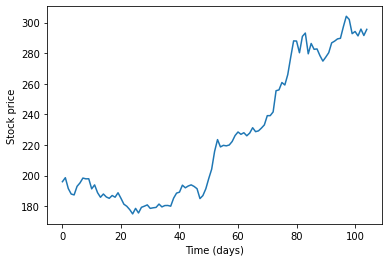

In [6]:
# Visualize stock prices
plt.plot(df['price'])
plt.xlabel("Time (days)")
plt.ylabel("Stock price")
plt.show()

**ARMA Model**

Let us now apply the ARMA model (Autoregressive {p} Moving Average {q}). The model has 2 parameters

**p** - the parameter associated with the Auto-Regressive part of the ARMA model. We can use the PACF (partial autocorrelation function) plot to find the optimal p value.

**q** - the parameter associated with the Moving Average part of the ARMA model. We can use the ACF (autocorrelation function) plot to find the optimal q value.

To know more about how to choose the AR(p) and MA(q) terms, click [here](https://people.duke.edu/~rnau/arimrule.htm).

Let's plot the PACF first.

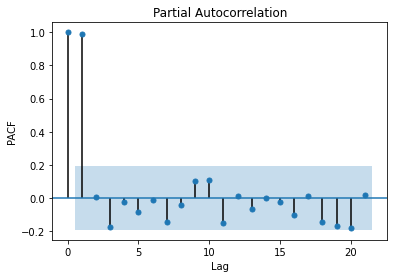

In [7]:
# Visualize PACF
plot_pacf(df['price'])
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.show()

From the above partial autocorrelation plot, we can select the p-value as 1.

In [8]:
# Create AR(1) model
ar = sm.tsa.ARMA(df['price'], order=(1, 0))
r1 = ar.fit()
print(r1.summary())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                  105
Model:                     ARMA(1, 0)   Log Likelihood                -309.860
Method:                       css-mle   S.D. of innovations              4.524
Date:                Fri, 11 Mar 2022   AIC                            625.719
Time:                        10:31:41   BIC                            633.681
Sample:                             0   HQIC                           628.945
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         241.8778     44.208      5.471      0.000     155.231     328.524
ar.L1.price     0.9957      0.005    191.375      0.000       0.985       1.006
                                    Roots       

We can access the AIC score of the model as follows:

In [9]:
# AIC score
r1.aic

625.7190317200132

The **Akaike information criterion (AIC)** is an estimator of prediction error and thereby the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

In simple words, AIC is a single number score that can be used to determine which of multiple models is most likely to be the best model for a given dataset. It estimates models relatively, meaning that AIC scores are only useful in comparison with other AIC scores for the same dataset. A **lower AIC score is better**.

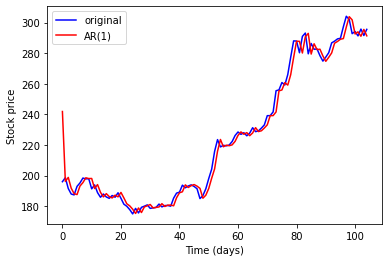

In [10]:
# Visualize prediction

plt.plot(df['price'], 'b', label="original")
plt.plot(r1.predict(), 'r', label="AR(1)")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Stock price")
plt.show()

### Moving Average Models

As an alternative to the autoregressive representation in which the $x_t$ on the left-hand side of the equation are assumed to be combined linearly, the moving average model of order $q$, abbreviated as MA(q), assumes the white noise $w_t$ on the right-hand side of the defining equation are combined linearly to form the observed data.

The **moving average model** of order q, or **MA(q)** model, is defined
to be 

$$x_t = w_t + θ_1w_{t−1} + θ_2w_{t−2} + · · · + θ_qw_{t−q},$$

where $w_t ∼ wn(0, σ^2_w)$, and $θ_1, θ_2, . . ., θ_q\ (θ_q \ne 0)$ are parameters.

Moving Average (MA) models for different order:

* MA(1) model:
$$ x_t = \theta_1 w_{t-1} + w_t $$

* MA(2) model:
$$ x_t = \theta_1 w_{t-1} + \theta_2 w_{t-2} + w_t $$

* MA(q) model:
$$ x_t = \theta_1 w_{t-1} + \theta_2 w_{t-2} + \cdots + \theta_q w_{t-q} + w_t $$

**Example 2:** Here we first simulate MA process data with $\theta = 0.5$ and visualize the prediction using the MA model.

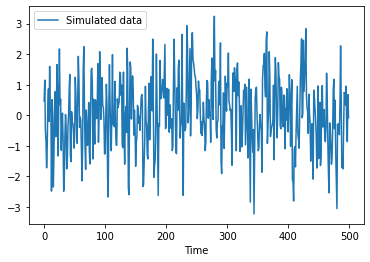

In [11]:
# Simulating an MA Process

# AR terms order
ar = np.array([1])
# MA terms order
ma = np.array([1, 0.5])
AR_object = ArmaProcess(ar, ma)
# Generate 500 samples
simulated_data = AR_object.generate_sample(nsample=500)

# Visualize simulated data
plt.plot(simulated_data, label="Simulated data")
plt.xlabel("Time")
plt.legend()
plt.show()

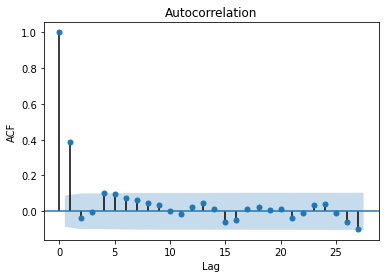

In [12]:
# Visualize ACF of simulated data
plot_acf(simulated_data)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

From the above autocorrelation plot, we can select the q-value as 1.

In [14]:
# Forecasting an MA Model
mod = sm.tsa.ARMA(simulated_data, order=(0, 1))
res = mod.fit()
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  500
Model:                     ARMA(0, 1)   Log Likelihood                -723.037
Method:                       css-mle   S.D. of innovations              1.027
Date:                Fri, 11 Mar 2022   AIC                           1452.074
Time:                        10:38:55   BIC                           1464.717
Sample:                             0   HQIC                          1457.035
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0617      0.068      0.902      0.367      -0.072       0.196
ma.L1.y        0.4894      0.037     13.141      0.000       0.416       0.562
                                    Roots           

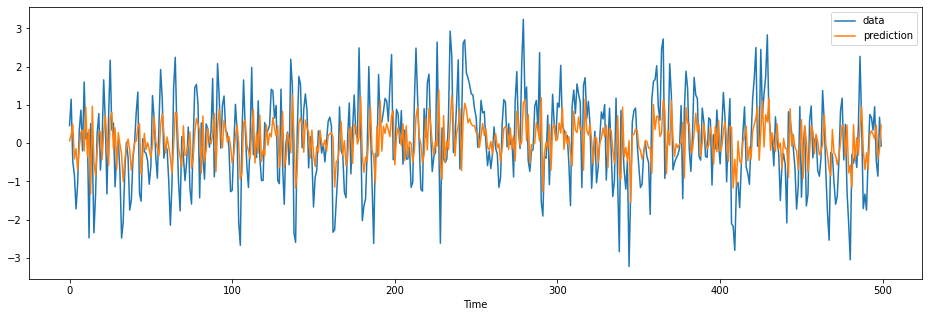

In [15]:
# Visualize prediction
plt.figure(figsize=(16,5))
plt.plot(simulated_data, label='data')
plt.plot(res.predict(), label='prediction')
plt.legend()
plt.xlabel("Time")
plt.show()

### Autoregressive Moving Average Models

Now let's proceed with the general development of autoregressive, moving average, and mixed autoregressive moving average (ARMA), models for stationary time series.

A time series $\{x_t;\ t = 0, ±1, ±2, . . .\}$ is $ARMA(p, q)$ if it is stationary and 

$$x_t = \phi_1 x_{t−1} + · · · + \phi_p x_{t−p} + w_t + θ_1w_{t−1} + · · · + θ_qw_{t−q},$$

with $\phi_p \ne 0,\ θ_q \ne 0$, and $σ^2_w > 0$. The parameters $p$ and $q$ are called the autoregressive and the moving average orders, respectively. If $x_t$ has a nonzero mean $\mu$, we set $α = \mu(1 − \phi_1 − · · · − \phi_p)$ and write the model as

$$x_t = α + \phi_1 x_{t−1} + · · · + \phi_p x_{t−p} + w_t + θ_1w_{t−1} + · · · + θ_qw_{t−q},$$

where $w_t ∼ wn(0, σ^2_w).$

As previously noted, when $q = 0$, the model is called an autoregressive model
of order $p,\ AR(p),$ and when $p = 0$, the model is called a moving average model of order $q,\ MA(q)$.

**Example 3:** We will analyze the `google_stock` dataset to identify the order of a moving average model i.e, `q`value and create an autoregressive moving average model for prediction.

From the first example, we know the p-value = 1.

We can use the ACF (autocorrelation function) plot to find the optimal q value.

Let's plot the autocorrelation function.

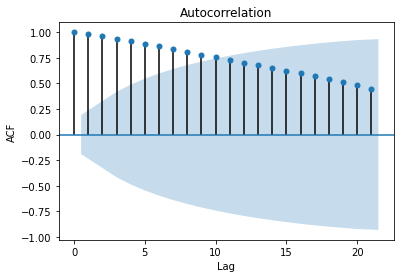

In [16]:
# Visualize ACF
plot_acf(df['price'])
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

From the above autocorrelation plot, we can select the q-value as 10.

In [17]:
# Create ARMA(p=1, q=10)
arma = sm.tsa.ARMA(df['price'].values, order=(1,10))
r2 = arma.fit()
print(r2.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  105
Model:                    ARMA(1, 10)   Log Likelihood                -306.728
Method:                       css-mle   S.D. of innovations              4.382
Date:                Fri, 11 Mar 2022   AIC                            639.457
Time:                        10:41:58   BIC                            673.958
Sample:                             0   HQIC                           653.437
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.0126     39.631      6.056      0.000     162.337     317.689
ar.L1.y        0.9904      0.011     87.155      0.000       0.968       1.013
ma.L1.y        0.1407      0.102      1.377      0.1

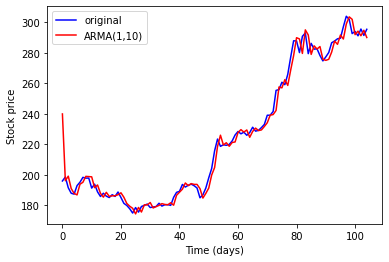

In [18]:
# Visualize prediction

plt.plot(df['price'], 'b', label="original")
plt.plot(r2.predict(), 'r', label="ARMA(1,10)")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Stock price")
plt.show()

**Example 4: Forecasting the Recruitment Series**

Recruitment series contains the number of new fish furnished by Dr. Roy Mendelssohn of the Pacific Environmental Fisheries Group. The series is for a period of 453 months ranging over the years 1950–1987.

Using the parameter estimates as the actual parameter values, let's forecast the Recruitment series over a 24-month horizon, m = 1, 2, . . ., 24. The actual forecasts are calculated as

$$x^n_{n+m} = 6.74 + 1.35x^n_{n+m−1} − .46x^n_{n+m−2}$$

for $n = 453$ and $m = 1, 2, . . ., 12.$

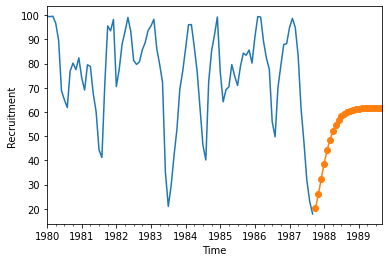

In [19]:
# Create an AR model
regr = sm.tsa.AR(rec).fit(maxlag=2)
# Predict next 23 instances
fore = regr.predict(start=len(rec), end=len(rec) + 23)

# Visualize forecasts
rec["1980":].plot(xlabel="Time", ylabel="Recruitment", legend=False)
fore.plot(marker="o")
plt.show()

**Example 5: Backcasting an ARMA(1, 1)**

Consider an ARMA(1, 1) process, $x_t = \phi x_{t−1} + θw_{t−1} + w_t$
; we will call this the
forward model.  Assuming the models are Gaussian, we also have that minimum mean square error prediction backward in time is the same as forward in time for ARMA models. Thus, the process can equivalently be generated by the backward model,

$$x_t = \phi x_{t+1} + θv_{t+1} + v_t,$$

where $v_t$ is a Gaussian white noise process with variance $σ^2_w$.

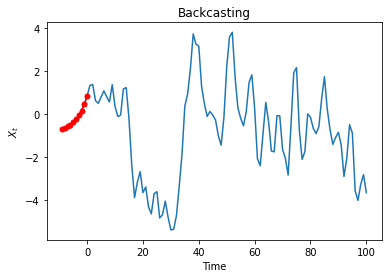

In [20]:
np.random.seed(90210)

# Generate ARMA process samples with ϕ = -0.9 and θ = 0.5
x = sm.tsa.arma_generate_sample(ar=[1, -.9], ma=[1, .5], nsample=100)
# xr is the reversed data
xr = np.flip(x) 

# predict the reversed data upto 9 instances
pxr = sm.tsa.ARMA(xr, order=(1, 1)).fit().predict(len(x), len(x) + 9) 

# reorder the predictors (for plotting)
pxrp = np.flip(pxr)

# attach the backcasts to the data
nx = pd.Series([*pxrp, *x], index=np.arange(-9, 101)) 

# Visualize backcasts
nx.plot(xlabel="Time", ylabel=r"$X_{t}$", title="Backcasting")
nx.iloc[:10].plot(marker="o", color="red", markersize=5)
plt.show()

**Example 6:** Here we use the ARMA model to predict the future values for the seasonal Industrial production data. 

**Dataset Description**

The dataset is the Industrial production of electric and gas utilities in the United States, from the years 1985–2018. It contains monthly data starting from 1/1/1985 to 1/1/2018 having 12 entries per year.

This data measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

In [21]:
# Read data
df1 = pd.read_csv("electric_production.csv")
df1.columns = ['Date','Production']
df1.head()

,Date,Production
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


To work with time series data, the 'date' column is converted into a datetime index.

In [22]:
# Convert Date column to datetime index
df1['Date'] = pd.to_datetime(df1['Date'])
df2 = df1.set_index('Date')
df2.head()

,Production
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


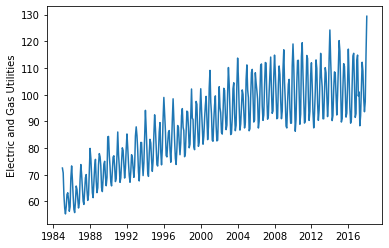

In [23]:
# Visualization of data
plt.plot(df2['Production'])
plt.ylabel("Electric and Gas Utilities")
plt.show()

As seen from the plot, this is seasonal data as there is some seasonality to it and an upward trend too.

Now comparing the 12 month simple moving average along with the series to ascertain the trend. The standard deviation is also plotted to see if there is any variance or no.

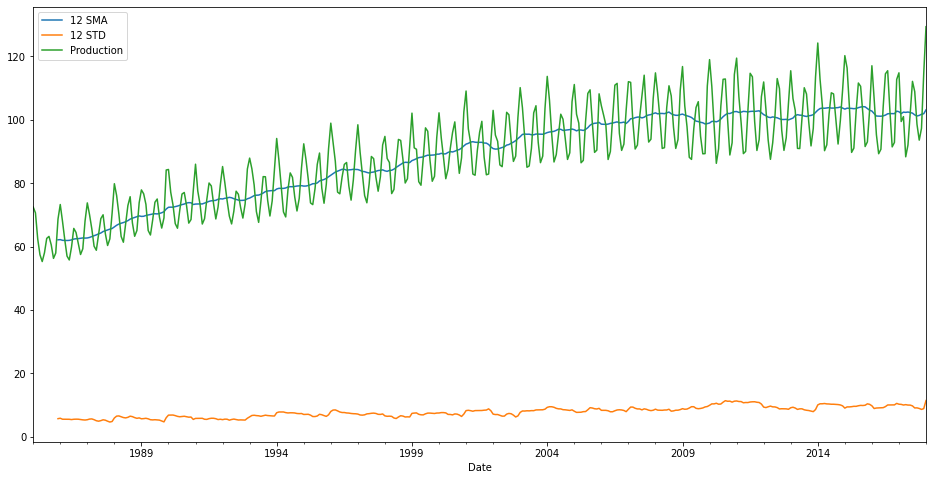

In [24]:
# 12 month simple moving average and standard deviation
df2['Production'].rolling(12).mean().plot(label='12 SMA',figsize=(16,8))
df2['Production'].rolling(12).std().plot(label='12 STD')
df2['Production'].plot()
plt.legend()
plt.show()

As seen from the above plot, the standard deviation is not varying much so there is not much variance.

Decomposition of the time series data to its trend, seasonality and residual components. The trend, seasonal and residual errors can be seen individually here.

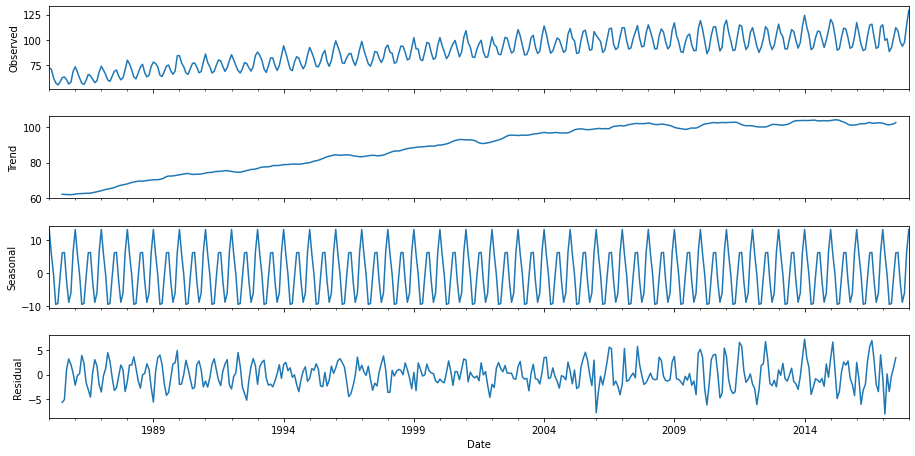

In [25]:
# Decompose time series
decomp = seasonal_decompose(df2['Production'])
fig = decomp.plot()
fig.set_size_inches(14,7)

**Plotting the ACF and PACF plot**

Text(0, 0.5, 'PACF')

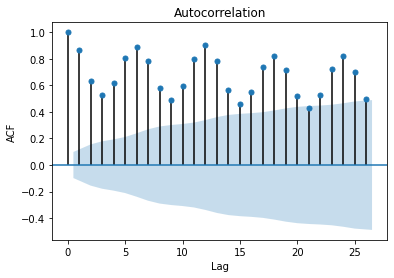

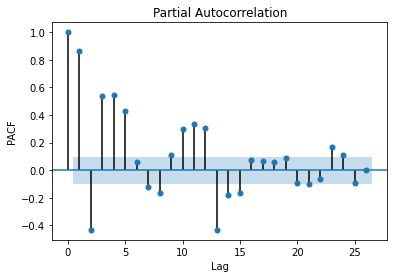

In [26]:
# Visualize ACF and PACF for Production series
p1 = plot_acf(df2['Production'].dropna()); plt.xlabel("Lag"); plt.ylabel("ACF")
p2 = plot_pacf(df2['Production'].dropna())
plt.xlabel("Lag")
plt.ylabel("PACF")

From the above plots, we can select the orders of autoregressive and moving average models i.e, p = 6 and q = 4.

**Constructing the ARMA model**

In [27]:
# Create ARMA(p=6, q=4) model
model = sm.tsa.ARMA(df2['Production'].dropna(),order=(6, 4))
# Fit model
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Production   No. Observations:                  397
Model:                     ARMA(6, 4)   Log Likelihood               -1049.754
Method:                       css-mle   S.D. of innovations                nan
Date:                Fri, 11 Mar 2022   AIC                           2123.509
Time:                        10:53:12   BIC                           2171.316
Sample:                    01-01-1985   HQIC                          2142.447
                         - 01-01-2018                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               88.8878      0.003   3.16e+04      0.000      88.882      88.893
ar.L1.Production     0.5897   4.13e-05   1.43e+04      0.000       0.590       0.590
ar.L2.Production     0.1288        nan        nan        nan         nan         nan
ar.L3.Production    -0.7072        nan        nan        nan         nan         nan
ar.L4.Production     0.5669   3.18e-05   1.78e+04      0.000       0.567       0.567
ar.L5.Production     0.1545        nan        nan        nan         nan         nan
ar.L6.Production     0.2671        nan        nan        nan         nan         nan
ma.L1.Production     0.2372      0.051      4.668      0.000       0.138       0.337
ma.L2.Production     0.0222      0.026      0.839      0.402      -0.030       0.074
ma.L3.Production     0.8996      0.025     35.688      0.000       0.850       0.949
ma.L4.Production     0.1966      0.050      3.923      0.000       0.098       0.295
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           -0.0000j            1.0000           -0.0000
AR.2            0.4993           -0.8664j            1.0000           -0.1668
AR.3            0.4993           +0.8664j            1.0000            0.1668
AR.4           -1.0148           -0.0000j            1.0148           -0.5000
AR.5           -0.7812           -1.7547j            1.9207           -0.3167
AR.6           -0.7812           +1.7547j            1.9207            0.3167
MA.1            0.5087           -0.9039j            1.0372           -0.1684
MA.2            0.5087           +0.9039j            1.0372            0.1684
MA.3           -1.0379           -0.0000j            1.0379           -0.5000
MA.4           -4.5554           -0.0000j            4.5554           -0.5000
-----------------------------------------------------------------------------
"""

**Predicting or forecasting**

By predicting the values, the model's performance can be ascertained. First, we can look into how it predicts the present data and then we move onto predicting future data.

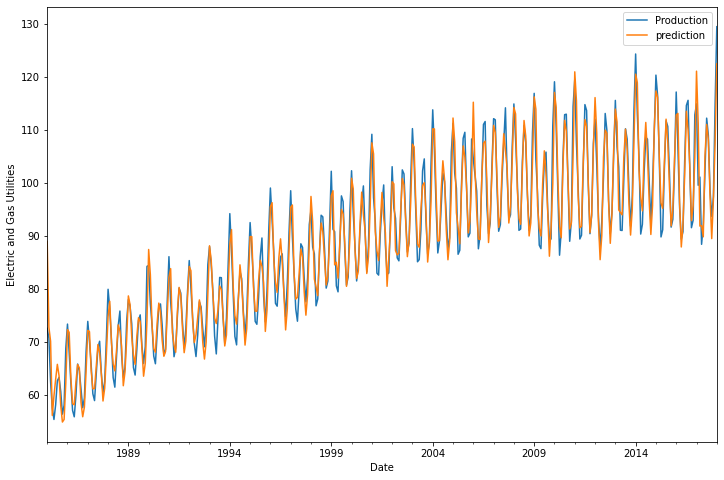

In [28]:
# Predict present data
df2['prediction'] = results.predict()
df2[['Production','prediction']].plot(figsize=(12,8))
plt.ylabel("Electric and Gas Utilities")
plt.show()

As seen from the above plot, the model does a good job of predicting the present data. Now to predict for the future, we can add more months to the dataset with null values and predict for it. The last index is obtained which is the last date and a month offset is added to it which starts from 1 and goes up to 24.

In [29]:
# Last five values of dataset
df2.tail()

,Production,prediction
Date,,
2017-09-01,98.6154,97.420987
2017-10-01,93.6137,89.429157
2017-11-01,97.3359,96.874422
2017-12-01,114.7212,107.548232
2018-01-01,129.4048,122.406780


In [30]:
# Create extra index dates
extra_dates = [df2.index[-1] + DateOffset(months=m) for m in range (1,24)]
extra_dates

[Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00')]

Now another dataframe is created with these extra future date values as index and the rest of the column values as null.

In [31]:
# Create new dataframe with extra index dates
forecast_df = pd.DataFrame(index=extra_dates,columns=df2.columns)
forecast_df.head()

,Production,prediction
2018-02-01,NaN,NaN
2018-03-01,NaN,NaN
2018-04-01,NaN,NaN
2018-05-01,NaN,NaN
2018-06-01,NaN,NaN


Now the original dataframe and this forecast dataframe are concatenated into a single one for forecasting.

In [32]:
# Concat dataframes
final_df = pd.concat([df2,forecast_df])
final_df.tail()

,Production,prediction
2019-08-01,NaN,NaN
2019-09-01,NaN,NaN
2019-10-01,NaN,NaN
2019-11-01,NaN,NaN
2019-12-01,NaN,NaN


Now we can predict the values for the end data points by mentioning the start and end arguments while calling the 'predict' function.

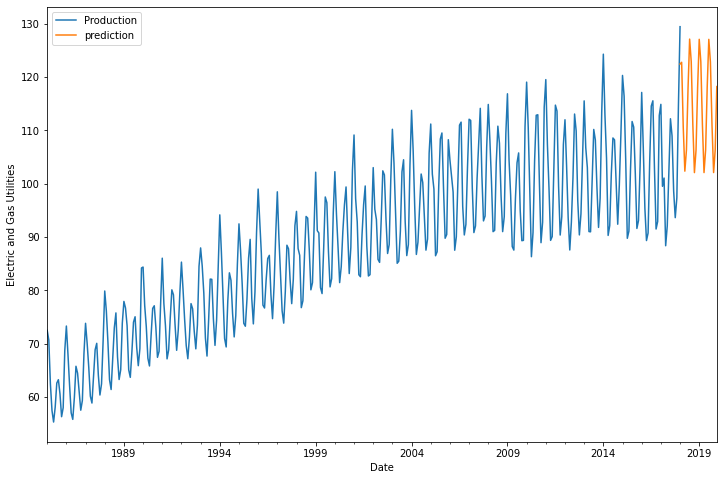

In [33]:
# Visualize prediction for extra index dates
final_df['prediction'] = results.predict(start=396, end=430)
final_df[['Production','prediction']].plot(figsize=(12,8))
plt.xlabel("Date")
plt.ylabel("Electric and Gas Utilities")
plt.show()

The prediction line can be seen clearly for the future values.